#Import Important Library


In [44]:
import pandas as pd
import numpy as np

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
#Load files

train_data = pd.read_csv("/content/drive/MyDrive/Data Fie/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Data Fie/test.csv")


In [47]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [49]:
train_data.shape

(1460, 81)

In [50]:
test_data.shape

(1459, 80)

#Data Preprocessing


In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#Finding Null Values

---



In [53]:
## Top 20 Fields of train data having null values
train_data.isnull().sum().sort_values(ascending=False).iloc[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [54]:
## Top 35 Fields of test data having null values
test_data.isnull().sum().sort_values(ascending=False).iloc[:35]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
MiscVal            0
BedroomAbvGr       0
dtype: int64

# Def function for delet columns having more than 80% null values

In [55]:
def filter(dataset):
    n=len(dataset)
    ll=[]
    for col in dataset.columns:
        if( dataset[col].isnull().sum()>=int(n*0.2) ): #taking 0.2 as ratio any attribute having more null values than 20% of total data is discarded
            ll.append(col)
    print(ll,"features removed from provided data")
    dataset.drop(ll,axis=1,inplace=True)
    return dataset

In [56]:
train_data = filter(train_data)
test_data = filter(test_data)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] features removed from provided data
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] features removed from provided data


In [57]:
train_data.isnull().sum().sort_values(ascending=False).iloc[:20]

LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
PavedDrive        0
WoodDeckSF        0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
dtype: int64

In [58]:
test_data.isnull().sum().sort_values(ascending=False).iloc[:35]

LotFrontage     227
GarageYrBlt      78
GarageFinish     78
GarageQual       78
GarageCond       78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
Utilities         2
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
Exterior2nd       1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
KitchenQual       1
TotalBsmtSF       1
Exterior1st       1
GarageArea        1
SaleType          1
GarageCars        1
MoSold            0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
YrSold            0
TotRmsAbvGrd      0
dtype: int64

# Def function for replacing null values mode for Object type & mean for int
---



In [59]:
def filter1(dataset):
    for col in dataset.columns:
        #print(dataset[col].dtypes)
        if dataset[col].dtypes=='object':
            dataset[col].fillna(dataset[col].mode()[0],inplace=True)
        elif dataset[col].dtypes=='int64' or dataset[col].dtypes=='float64':
            dataset[col].fillna(dataset[col].mean(),inplace=True)            

    return dataset

In [60]:
train_data=filter1(train_data)
test_data=filter1(test_data)

# Again Cheack for null Values 

In [61]:
train_data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [62]:
test_data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

# Handling Catagorical data with one hot

In [63]:
total= pd.concat([train_data.drop(['SalePrice'],axis=1),test_data]
,axis=0)

## func to convert into one hot encoder form
def category_onehot_multcols(multcolumns):
    df_final=total
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(total[fields],drop_first=True)
        
        total.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
    df_final=pd.concat([total,df_final],axis=1) 
    return df_final


In [64]:
columns=['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [65]:

## passing our total Dataframe for one hot encoder
total=category_onehot_multcols(columns)
save_cols=total.columns

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [66]:
from sklearn.preprocessing import StandardScaler
x = total.values
x = StandardScaler().fit_transform(x)
x=pd.DataFrame(x,columns=save_cols)

In [67]:
x = total.duplicated()

In [68]:
x.unique().sum()

0

In [69]:
# splitting scaled total data into train and test data
train = x.iloc[:1460]
test = x.iloc[1460:]
# getting predicting values i.e SalePrice into "y" and scaling it .. 
# separately 
y = train_data['SalePrice'].values
sc=StandardScaler()
y = pd.DataFrame(sc.fit_transform(y.reshape(-1,1)))
y.columns=['SalePrice']
train = pd.concat([train,y],axis=1)

In [70]:
x

0       False
1       False
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456    False
1457    False
1458    False
Length: 2919, dtype: bool

In [80]:
train.corr().reset_index()[['index','SalePrice']]


,index,SalePrice
0,0,NaN
1,SalePrice,1.0


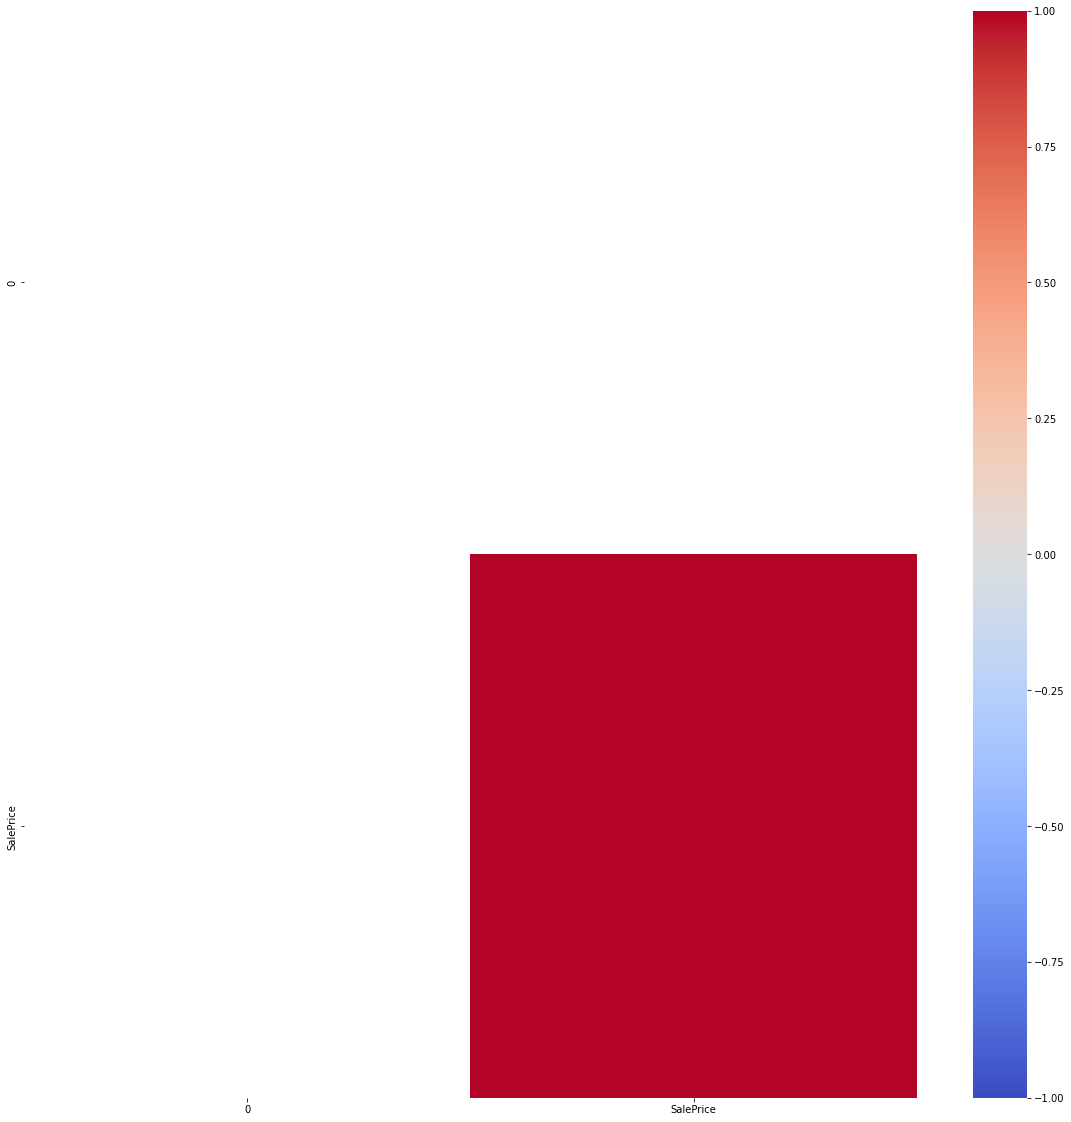

In [74]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm

corr = train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,vmin=-1,vmax=1,cmap='coolwarm')
     

In [75]:
x

0       False
1       False
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456    False
1457    False
1458    False
Length: 2919, dtype: bool

In [79]:
test.shape

(1459,)